# Machine learning HW_03


Домашнее задание №3  
В данном домашнем задании вам необходимо будет научиться кластеризовать данные о пациентах с заболеваниями спины. В данных приведены измерения по 6 переменным:   
• pelvic incidence  
• pelvic tilt  
• lumbar lordosis angle  
• sacral slope  
• pelvic radius  
• degree_spondylolisthesis  
• class  

Для кластеризации в данном задании вам предлагается взять переменные pelvic_radius и degree_spondylolisthesis. Однако, вы можете поэкспериментировать и предложить другие переменные.  
1. Нарисуйте Scatter-Plot для базовой классификации (данные лежат в переменной class). (1балл)
NB! Для следующий операций создайте отдельный датасет, который не содержит переменной class.
2. Оцените, какое количество кластеров будет оптимальным для этих данных. Изобразите график. (2 балла)  
3. Напишите классификатор Kmeans на основании данных об оптимальном числе кластеров, проведите кластеризацию на ваших данных. Визуализируйте полученные результаты и отразите центроиды на графике. (2 + 2 балла)  
4. Напишите иерархический классификатор (агломеративный алгоритм) , попробуйте подобрать метод, который лучше всего будет кластеризовать. (2 + 2 балла)  
5. Визуализируйте полученные результаты иерархической кластеризации. Предположите, какой из них работает лучше всего. (1 + 1 балл)  
6. Сравните метрики качества модели ( 'ARI', 'AMI','Homogenity' 'Completeness', 'V-measure' ARI'ARI', 'AMI','Homogenity' 'Completeness', 'V-measure' , 'ARI', 'AMI','Homogenity' 'Completeness', 'V-measure' AMI'ARI', 'AMI','Homogenity' 'Completeness', 'V-measure' ,'ARI', 'AMI','Homogenity' 'Completeness', 'V-measure' Homogenity'ARI', 'AMI','Homogenity' 'Completeness', 'V-measure' 'ARI', 'AMI','Homogenity' 'Completeness', 'V-measure' Completeness'ARI', 'AMI','Homogenity' 'Completeness', 'V-measure' , 'ARI', 'AMI','Homogenity' 'Completeness', 'V-measure' V-measure'ARI', 'AMI','Homogenity' 'Completeness', 'V-measure' 'ARI', 'AMI','Homogenity' 'Completeness', 'V-measure' Silhouette'ARI', 'AMI','Homogenity' 'Completeness', 'V-measure' ). На основании полученных метрик сделайте вывод о том, какой алгоритм использовать лучше всего (1 + 2 балла).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import decomposition
from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import pairwise_distances
from scipy.stats import spearmanr
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
%matplotlib inline

In [ ]:
#from sklearn.datasets import make_blobs
#from sklearn import datasets
#from scipy.cluster import hierarchy
#from scipy.spatial.distance import pdist
# AffinityPropagation, SpectralClustering

In [ ]:
data = pd.read_csv("column_3C_weka.csv")
data.columns

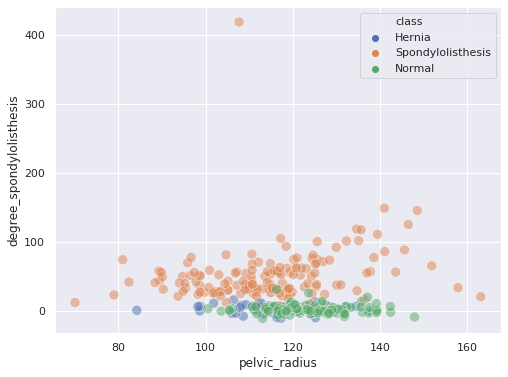

In [7]:
sns.set(rc={'figure.figsize':(8,6)})
sns.scatterplot(x="pelvic_radius", y="degree_spondylolisthesis",hue="class",data=data,s=100,alpha=0.5)

In [6]:
X =  data.drop("class",axis=1)
y = data.loc[:,"class"]

Сделаем анализ главных компонент, поищем аутлаеры если такие имеются.

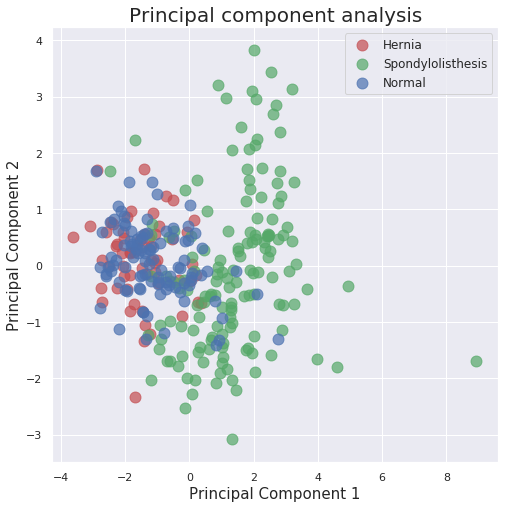

In [33]:
X1 = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X1)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, data["class"]], axis = 1)
#finalDf.head(5)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Principal component analysis', fontsize = 20)


classes = data["class"].unique()
colors = ['r', 'g', 'b']
for class_type, color in zip(classes,colors):
    indicesToKeep = finalDf['class'] == class_type
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 120
               , alpha = .7)
ax.legend(classes,fontsize=12)
#ax.grid()
sns.set()

In [ ]:
#расчет количества кластеров
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0)
    km.fit(X)
    distortions.append(np.sqrt(km.inertia_))

plt.plot(range(1, 11), distortions, marker='o')
plt.title("Cluster elucidation plot")
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')
plt.show()

In [ ]:
km = KMeans(n_clusters=3,random_state=0,).fit(X)
y_kmeans = km.predict(X)

plt.scatter(X.pelvic_radius, 
            X.degree_spondylolisthesis, 
            c=y_kmeans,
            cmap=plt.cm.Paired,
            s=100,alpha=.6)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],marker="x",c='black',s=500,label='centroids')
plt.legend(scatterpoints=1)
plt.title("Кластеры")
plt.xlabel("pelvic_radius")
plt.ylabel("degree_spondylolisthesis")
plt.show()

Напишите иерархический классификатор (агломеративный алгоритм) , попробуйте подобрать метод, который лучше всего будет кластеризовать. (2 + 2 балла) 

In [ ]:
linkages = ['average','single','complete']
distances = ['braycurtis', 'canberra', 'chebyshev','spearman','correlation','hamming','minkowski','seuclidean','sqeuclidean']
# классическая евклидова метрика и коэффициент корреляции спирмена вшиты в цикл

y = data.loc[:,'class'] # провека по кластеру
clust_1 = 2
clust_n = 11

In [ ]:
warnings.filterwarnings('ignore')
metrics_dict ={}
for linkage in linkages:
    if linkage != 'ward':
        for distance in distances:
            if distance != 'spearman':
                for Ncluster in range(clust_1,clust_n):
                    alg = AgglomerativeClustering(n_clusters=Ncluster,linkage=linkage,affinity='precomputed').\
                    fit(pairwise_distances(X,metric=distance))
    
                    # calculating statistics 
                    ARI_value = metrics.adjusted_rand_score(y, alg.labels_)
                    AMI_value = metrics.adjusted_mutual_info_score(y, alg.labels_)
                    homogenity = metrics.homogeneity_score(y, alg.labels_)
                    completeness  = metrics.completeness_score(y, alg.labels_)
                    v_measure = metrics.v_measure_score(y, alg.labels_)
                    silhouette = metrics.silhouette_score(X, alg.labels_)
    
                    # combining statistics for algorithm with certain parameters
                    stat_data = [ARI_value, AMI_value,homogenity,completeness,v_measure,silhouette]
                
                    # create algorithm name
                    list_name = list(map(str,[linkage,distance,Ncluster]))
                    alg_name = "_".join(list_name)
                    metrics_dict.update({str(alg_name):stat_data})
            else:
                for Ncluster in range(clust_1,clust_n):
                    distance = "spearman"
                    # creation working classifier
                    alg = AgglomerativeClustering(n_clusters=Ncluster,linkage=linkage,affinity='precomputed').\
                    fit(spearmanr(X,axis=1)[0])
                    
                    # calculating statistics 
                    ARI_value = metrics.adjusted_rand_score(y, alg.labels_)
                    AMI_value = metrics.adjusted_mutual_info_score(y, alg.labels_)
                    homogenity = metrics.homogeneity_score(y, alg.labels_)
                    completeness  = metrics.completeness_score(y, alg.labels_)
                    v_measure = metrics.v_measure_score(y, alg.labels_)
                    silhouette = metrics.silhouette_score(X, alg.labels_)
    
                    # combining statistics for algorithm with certain parameters
                    stat_data = [ARI_value, AMI_value,homogenity,completeness,v_measure,silhouette]
                
                    # create algorithm name
                    list_name = list(map(str,[linkage,distance,Ncluster]))
                    alg_name = "_".join(list_name)
                    metrics_dict.update({str(alg_name):stat_data})
                
    elif linkage == 'ward': # works only with eucledian distance
        for Ncluster in range(clust_1,clust_n):
                distance = "euclidean"
                # creation working classifier
                alg = AgglomerativeClustering(n_clusters=Ncluster,linkage=linkage,affinity='precomputed').\
                    fit(pairwise_distances(X,metric=distance))
    
                # calculating statistics 
                ARI_value = metrics.adjusted_rand_score(y, alg.labels_)
                AMI_value = metrics.adjusted_mutual_info_score(y, alg.labels_)
                homogenity = metrics.homogeneity_score(y, alg.labels_)
                completeness  = metrics.completeness_score(y, alg.labels_)
                v_measure = metrics.v_measure_score(y, alg.labels_)
                silhouette = metrics.silhouette_score(X, alg.labels_)
    
                # combining statistics for algorithm with certain parameters
                stat_data = [ARI_value, AMI_value,homogenity,completeness,v_measure,silhouette]
                
                # create algorithm name
                list_name = list(map(str,[linkage,distance,Ncluster]))
                alg_name = "_".join(list_name)
                metrics_dict.update({str(alg_name):stat_data})

metrics_dict = pd.DataFrame.from_dict(metrics_dict).rename(index={0:"ARI",
                                                                 1:"AMI",
                                                                  2:"homogenity",
                                                                  3:"completeness",
                                                                  4:"v_measure",
                                                                  5:"silhouette"}).T.sort_values("silhouette",ascending=False)

In [ ]:
params = pd.DataFrame.from_records(pd.Series(metrics_dict.index).str.split("_"),\
                          columns=["linkage","distance","n_clusters"])
metrics_dict.reset_index(drop=True, inplace=True)
metrics_dict = pd.concat([params, metrics_dict], axis=1)

In [ ]:
metrics_dict.head(10)

в теории, у нас нет колонки с размеченным классами и мы не можем пользовться метриками кроме silhuette (так как несчет сравнить успешность кластеризации) и брать топовые параметры по метрике silhuette. но кроме этого, нужно понимать свои данные: значимы ли двойные нули или нет. в нашем случае да, потому будем оценивать только метрики, которые учитывают двойные нули: уберем из датафрейма все результаты метрик,неучитывающих двойные нули

In [ ]:
metrics_dict2 = metrics_dict.query('["minkowski","seuclidean","euclidean","manhattan","chebyshev","sqeuclidean"] not in distance')
metrics_dict2.head(10)

Несмотря на то, что топовый метод по метрике complete получился complete, я бы выбрал single (он второй), так как тот лучше подходит для градиентов. А мы уже видели, что наши размеченные классы достаточно сильно перемешиваются.

таким образом лучшими параметрами для кластеризации нашего датасета являются:  
**расстояние** - коэффициент корреляции Пирсона  
**метод - complete** (хотя лучше взять single, который лучше подходит для градиентов, ведь на графикаъ выше 2 класса достаточно хорошо "перемешиваются" между собой).   
**количество кластеров** - скорее 2, несмотря на то, что в топ-10 параметров появляется "3" два раза и у нас есть колонка с размеченными 3 классами. 

In [ ]:
km = KMeans(n_clusters=3,random_state=0,).fit(X)
y_kmeans = km.predict(X)

plt.scatter(X.pelvic_radius, 
            X.degree_spondylolisthesis, 
            c=y_kmeans,
            cmap=plt.cm.Paired,
            s=100,alpha=.6)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],marker="x",c='black',s=500,label='centroids')
plt.legend(scatterpoints=1)
plt.title("Кластеры")
plt.xlabel("pelvic_radius")
plt.ylabel("degree_spondylolisthesis")
plt.show()